In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import string
import re
tf.random.set_seed(11)


In [11]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)


Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
pd_data_train = pd.read_csv('train.csv')
pd_data_train = pd_data_train.fillna(0)
# pd_data_train = pd.get_dummies(pd_data_train, columns=['keyword'])
pd_data_train.drop(columns=['location','keyword'], inplace=True)

In [14]:
X = pd_data_train.drop(columns=['target','id']).to_numpy()
Y = pd_data_train['target'].to_numpy()
Y = tf.keras.utils.to_categorical(Y, 2)

In [ ]:
# tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=2500)
# x_preprocessed = []
# for i in range(len(X[:,0:1])):
#     print(X[i:i+1][0][0])
#     tokens = X[i:i+1][0][0].split()
#     tokens = [i.lower() for i in tokens]
#     tokens = [i.translate(str.maketrans('', '', string.punctuation)) for i in tokens]
#     tokens = [re.sub("\s+", " ", i) for i in tokens]
#     x_preprocessed.append(" ".join(tokens))
# x_tf = tfidf.fit_transform(x_preprocessed).toarray()
# x_tf = np.concatenate((x_tf, X[:,1:]), axis=1).astype('float32')
# x_train, x_test, y_train, y_test = train_test_split(x_tf, Y, test_size=0.2, random_state=23)
# # y_train = y_train.flatten()

Word Embeddings


In [16]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=200)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(x)
padder = tf.keras.preprocessing.sequence.pad_sequences
padded = padder(sequences, padding='post')

vocab_size = len(word_index) + 1

padded.shape


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

TFIDF vectorizer


In [6]:
# tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features=2000)
# x = tfidf.fit_transform(X).toarray()


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [9]:
# x_train, x_val, y_train, y_val = train_test_split(
#     x, Y, test_size=0.20, random_state=10)
# x_train, x_test, y_train, y_test = train_test_split(
#     x_train, y_train, test_size=0.10, random_state=10)

# embedding_dim = 75
# max_length = len(x_train[0])

# print(x_train.shape)
# print(y_train.shape)
# print(x_val.shape)
# print(y_val.shape)
# print(x_test.shape)
# print(y_test.shape)


NN with lstm layers


In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.005), activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
model.summary()


NameError: name 'vocab_size' is not defined

NN using Dense layers only


In [11]:
# inputs = tf.keras.Input(shape=x_train[0].shape)
# outputs = tf.keras.layers.Dense(1024, activation='relu')(inputs)
# outputs = tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1_l2(0.001), activation='relu')(outputs)
# outputs = tf.keras.layers.Dense(64, activation='relu')(outputs)
# outputs = tf.keras.layers.Dropout(0.2)(outputs)
# outputs = tf.keras.layers.Dense(16, activation='relu')(outputs)
# outputs = tf.keras.layers.Dense(2, activation='sigmoid')(outputs)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)
# model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2500)]            0         
                                                                 
 dense (Dense)               (None, 1024)              2561024   
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 2)                 34    

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), loss="binary_crossentropy", metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(
    x_test, y_test), verbose=2)

Epoch 1/50
96/96 - 2s - loss: 2.4225 - accuracy: 0.6874 - val_loss: 0.6103 - val_accuracy: 0.7905 - 2s/epoch - 17ms/step
Epoch 2/50
96/96 - 0s - loss: 0.4958 - accuracy: 0.8363 - val_loss: 0.5276 - val_accuracy: 0.7978 - 480ms/epoch - 5ms/step
Epoch 3/50
96/96 - 0s - loss: 0.3897 - accuracy: 0.8775 - val_loss: 0.5497 - val_accuracy: 0.7879 - 453ms/epoch - 5ms/step
Epoch 4/50
96/96 - 0s - loss: 0.3312 - accuracy: 0.9082 - val_loss: 0.6175 - val_accuracy: 0.7820 - 422ms/epoch - 4ms/step
Epoch 5/50
96/96 - 0s - loss: 0.2795 - accuracy: 0.9330 - val_loss: 0.6647 - val_accuracy: 0.7754 - 444ms/epoch - 5ms/step
Epoch 6/50
96/96 - 0s - loss: 0.2172 - accuracy: 0.9548 - val_loss: 0.7317 - val_accuracy: 0.7597 - 447ms/epoch - 5ms/step
Epoch 7/50
96/96 - 0s - loss: 0.1958 - accuracy: 0.9640 - val_loss: 0.7444 - val_accuracy: 0.7649 - 437ms/epoch - 5ms/step
Epoch 8/50
96/96 - 0s - loss: 0.1834 - accuracy: 0.9681 - val_loss: 0.8523 - val_accuracy: 0.7781 - 436ms/epoch - 5ms/step
Epoch 9/50
96/96 -

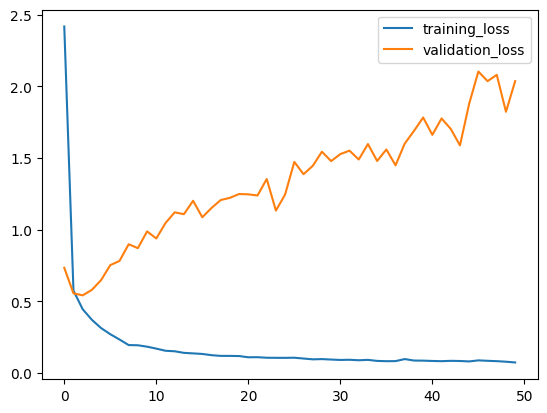

In [117]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()


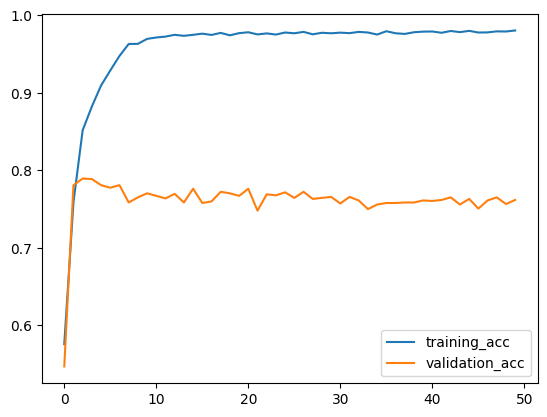

In [113]:
plt.plot(history.history['accuracy'], label='training_acc')
plt.plot(history.history['val_accuracy'], label='validation_acc')
plt.legend()


Predict on test set

In [66]:
def create_submission(model, data):
    submission = pd.DataFrame()
    submission['id'] = data[0]
    predictions = model.predict(data[1])
    submission['target'] = [i.argmax() for i in predictions]
    print(submission.head())
    return submission.to_csv('NN_submission.csv', index=False)
    

In [54]:
preds = model.predict(x_test)
errors = 0
for i in range(len(preds)):
    pred_ind = np.argmax(preds[i])
    target = np.argmax(y_test[i])
    if pred_ind != target:
        errors +=1
print(f'Total Errors: {errors}')
print(f'Accuracy: {(1 - (errors / len(preds)))*100}%')

Total Errors: 116
Accuracy: 80.95238095238095%


## Creating Submission 

In [58]:
# test_data = pd.read_csv('test.csv')
# test_x = test_data['text'].to_numpy()
# test_x = remove_punctuation(test_x)
# test_x = lower_case(test_x)
# test_x = tfidf.transform(test_x).toarray()
# test_x.shape

(3263, 2000)

In [67]:
# create_submission(model, (test_data['id'], test_x))

   id  target
0   0       1
1   2       1
2   3       1
3   9       0
4  11       1
